# Y.Afisha

En esta investigación se realizará un análisis a tres dataset del departamento analítico de Y.Afisha, para optimizar los gastos de marketing, se analizarán registros del servidor con datos de enero del 2017 hasta diciembre del 2018 , y así observar como la gente usa el producto, cuando comienzan a comprar, cuando pagan y los ingresos que trae cada usuario.


Por este motivo, se buscará lo siguiente:


1. Abrir los archivos de datos y analizar la información general.
2. Preprocesar los datos.
3. Realizar un análisis de datos.
4. Realizar informes y calcular métricas.
5. Escribir una conclusión general

## Abrir los archivos y prepararlos

In [1]:
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
visits_data = pd.read_csv('/datasets/visits_log_us.csv')
visits_data

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [3]:
visits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits_data = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device':'category'}, parse_dates=['End Ts', 'Start Ts'])
visits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [5]:
visits_data.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [6]:
visits_data.duplicated().sum()

0

In [7]:
visits_data.drop(visits_data[visits_data['End Ts'] > '2018-06-01'].index, inplace=True)

In [8]:
orders_data = pd.read_csv('/datasets/orders_log_us.csv')
orders_data

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [9]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
orders_data = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [11]:
orders_data.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [12]:
orders_data.duplicated().sum()

0

In [13]:
costs_data = pd.read_csv('/datasets/costs_us.csv')
costs_data

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [14]:
costs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [15]:
costs_data = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])
costs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [16]:
costs_data.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [17]:
costs_data.duplicated().sum()

0

Se puede observar que hay los dataframes no poseen valores ausentes; sin embargo, se tuvo que cambiar algunos tipos de columnas como el tipo object al tipo category, o las columnas de fecha a su tipo datetime, para poder optimizar los datos.

## Calcular métricas

### Producto

#### ¿Cuántas personas lo usan cada día, semana y mes?

In [18]:
visits_data['day'] = visits_data['Start Ts'].dt.date
visits_data['year'] = visits_data['Start Ts'].dt.year
visits_data['week'] = visits_data['Start Ts'].astype('datetime64[W]')
visits_data['month'] = visits_data['Start Ts'].astype('datetime64[M]')
visits_data.head()

,Device,End Ts,Source Id,Start Ts,Uid,day,year,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018,2018-05-17,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017,2017-12-21,2017-12-01


In [19]:
visits_data = visits_data.rename(columns={'Source Id': 'source_id'})
visits_data.head()

,Device,End Ts,source_id,Start Ts,Uid,day,year,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018,2018-05-17,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017,2017-12-21,2017-12-01


In [20]:
dau_total = visits_data.groupby('day').agg({'Uid': 'nunique'}).mean()
wau_total = visits_data.groupby(['year', 'week']).agg({'Uid': 'nunique'}).mean()
mau_total = visits_data.groupby(['year', 'month']).agg({'Uid': 'nunique'}).mean()
print(int(dau_total))
print(int(wau_total))
print(int(mau_total))

907
5621
23227


In [21]:
dau = visits_data.groupby('day').agg({'Uid': 'nunique'})
wau = visits_data.groupby('week').agg({'Uid': 'nunique'})
mau = visits_data.groupby('month').agg({'Uid': 'nunique'})

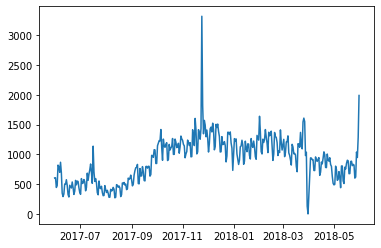

In [22]:
plt.plot(dau)
plt.show()


En el gráfico, se puede apreciar que en los usuarios diarios activos hay un pico alto finalizando el año 2017, se reduce después de marzo del 2018, y vuelve a subir en mayo del 2018.

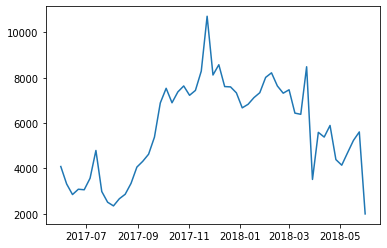

In [23]:
plt.plot(wau)
plt.show()

En el gráfico, se puede apreciar que en los usuarios semanales activos hay un pico alto finalizando el año 2017, se reduce después de marzo del 2018, y vuelve a bajar en mayo del 2018.

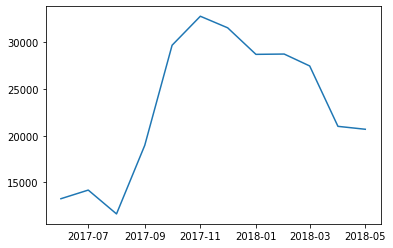

In [24]:
plt.plot(mau)
plt.show()

En el gráfico, se puede apreciar que en los usuarios mensuales activos hay un pico alto finalizando el año 2017, se reduce después de marzo del 2018, y se estabiliza en mayo del 2018.

#### ¿Con qué frecuencia regresan los usuarios?

In [25]:
sticky_wau = dau_total / wau_total * 100
sticky_mau = dau_total / mau_total * 100
print(sticky_wau)
print(sticky_mau)

Uid    16.151575
dtype: float64
Uid    3.908959
dtype: float64


Después de realizar el análisis de las métricas se pudo observar que en promedio hay 907 usuarios únicos activos diarios, 5716 usuarios activos semanales, y 23228 usuarios activos mensuales. Asimismo, se pudo observar que tan leal puede ser la audiencia con la métrica sticky factor; para ver con que frecuencia regresan, de forma semanal la frecuencia es en promedio de 16 usuarios que regresan, y mensual en promedio de 4 usuarios regresan.

#### ¿Cuántas sesiones hay por día?

In [26]:
sessions_per_user = visits_data.groupby('day').agg({'Uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['session_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
sessions_per_user

,n_sessions,n_users,session_per_user
day,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


<AxesSubplot:>

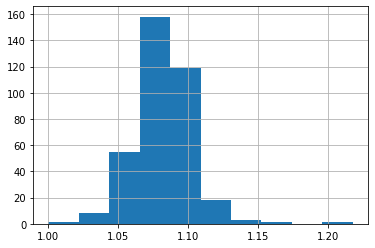

In [27]:
sessions_per_user['session_per_user'].hist(bins=10)

Se puede observar que las sesiones de usuarios promedio donde más se concentra por cada usuario en el sitio web estan entre 1.07 a 1.09 sesiones por usuario.

<AxesSubplot:>

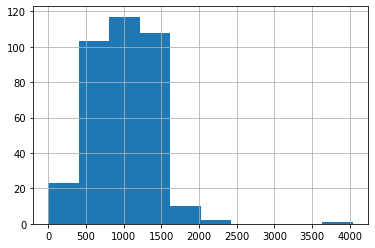

In [28]:
sessions_per_user['n_sessions'].hist(bins=10)

Se puede observar que la cantidad de sesiones donde más se concentra las sesiones por cada usuario en el sitio web estan entre 800 a 1200 sesiones.

<AxesSubplot:>

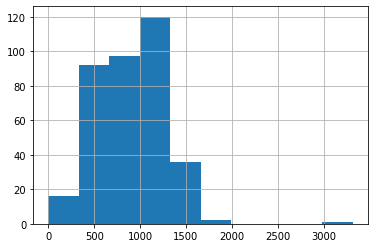

In [29]:
sessions_per_user['n_users'].hist(bins=10)

Se puede observar que la cantidad de usuarios donde más se concentra las sesiones por cada usuario en el sitio web estan entre 1000 a 1300 usuarios.

#### ¿Cuánto es la duración media por sesión?

In [30]:
visits_data['session_duration_sec'] = (visits_data['End Ts'] - visits_data['Start Ts']).dt.seconds
asl = visits_data['session_duration_sec'].mode()
asl

0    60
dtype: int64

In [31]:
visits_data['session_duration_sec'].describe()

count    359389.000000
mean        643.464914
std        1016.279689
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

<AxesSubplot:>

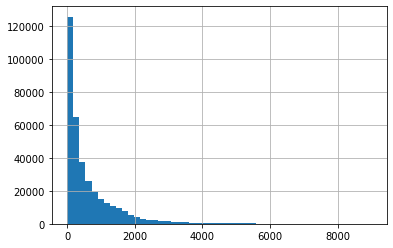

In [32]:
visits_data['session_duration_sec'].hist(bins=50, range=(0, 9000))

la duración media de la sesión o la más habitual por usuario en el sitio web es de 60 segundos. Se decidió utilizar la moda y no la media para el cálculo de la duración media, debido a que la distribucion no es normal ni casi normal. Por este motivo, la moda será un mejor indicador.

#### Cálculo de la tasa de retención

In [33]:
first_visits = visits_data.groupby('Uid').agg({'month': 'min'}).reset_index()
first_visits.columns = ['Uid', 'first_visits_month']
first_visits.head()

,Uid,first_visits_month
0,11863502262781,2018-03-01
1,49537067089222,2018-02-01
2,297729379853735,2017-06-01
3,313578113262317,2017-09-01
4,325320750514679,2017-09-01


In [34]:
cohorts_visits = first_visits.groupby('first_visits_month').agg({'Uid': 'nunique'}).reset_index()
cohorts_visits.columns = ['first_visits_month', 'n_buyers2']
cohorts_visits.head()

,first_visits_month,n_buyers2
0,2017-06-01,13259
1,2017-07-01,13140
2,2017-08-01,10181
3,2017-09-01,16704
4,2017-10-01,25977


In [35]:
visits_ = pd.merge(visits_data, first_visits, on='Uid')
visits_.head()

,Device,End Ts,source_id,Start Ts,Uid,day,year,week,month,session_duration_sec,first_visits_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017,2017-12-14,2017-12-01,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018,2018-02-15,2018-02-01,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018,2018-05-17,2018-05-01,1440,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018,2018-03-08,2018-03-01,1680,2018-03-01


In [36]:
initial_visits_count = visits_.groupby(['first_visits_month', 'month']).agg({'Uid': 'nunique'}).reset_index()
retention = pd.merge(cohorts_visits, initial_visits_count, on='first_visits_month')
retention['retention'] = retention['Uid'] / retention['n_buyers2']
retention['cohort_lifetime_visits'] = (retention['month'] - retention['first_visits_month']) / np.timedelta64(1, 'M')
retention['cohort_lifetime_visits'] = retention['cohort_lifetime_visits'].round().astype('int')
retention.head()

,first_visits_month,n_buyers2,month,Uid,retention,cohort_lifetime_visits
0,2017-06-01,13259,2017-06-01,13259,1.000000,0
1,2017-06-01,13259,2017-07-01,1043,0.078664,1
2,2017-06-01,13259,2017-08-01,713,0.053775,2
3,2017-06-01,13259,2017-09-01,814,0.061392,3
4,2017-06-01,13259,2017-10-01,909,0.068557,4


In [37]:
result = retention.pivot_table(index='first_visits_month', columns='cohort_lifetime_visits', values='retention', aggfunc='mean').round(2)
result

cohort_lifetime_visits,0,1,2,3,4,5,6,7,8,9,10,11
first_visits_month,,,,,,,,,,,,
2017-06-01,1.0,0.08,0.05,0.06,0.07,0.07,0.06,0.06,0.05,0.05,0.04,0.04
2017-07-01,1.0,0.06,0.05,0.06,0.06,0.05,0.05,0.05,0.04,0.03,0.03,NaN
2017-08-01,1.0,0.08,0.06,0.06,0.05,0.04,0.04,0.04,0.03,0.03,NaN,NaN
2017-09-01,1.0,0.09,0.07,0.05,0.04,0.04,0.04,0.02,0.02,NaN,NaN,NaN
2017-10-01,1.0,0.08,0.05,0.04,0.03,0.03,0.02,0.02,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.08,0.04,0.04,0.03,0.02,0.02,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.06,0.04,0.03,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.06,0.04,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.06,0.03,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'retención promedio de los clientes'}, xlabel='cohort_lifetime_visits', ylabel='first_visits_month'>

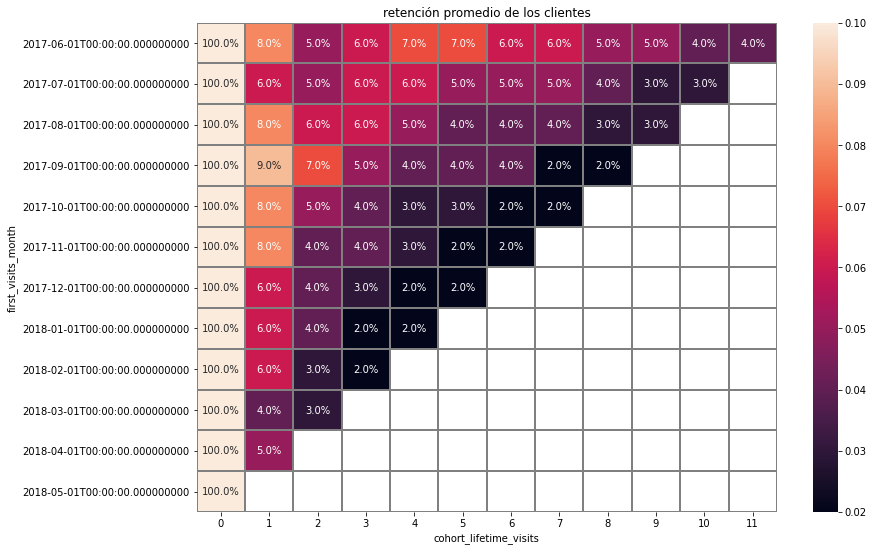

In [38]:
plt.figure(figsize=(13, 9))
plt.title('retención promedio de los clientes')
sns.heatmap(result, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1)

Se puede apreciar, que a partir del segundo mes de vida la tasa de retención se encuentra disminuyendo, es decir los usuarios no permacen en el sitio web.

### Ventas

#### ¿Cuántos pedidos realizan durante un período de tiempo determinado?

In [39]:
orders_data.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [40]:
orders_per_user = orders_data.groupby('Uid').agg({'Buy Ts': 'count'}).reset_index()
orders_per_user

,Uid,Buy Ts
0,313578113262317,1
1,1575281904278712,2
2,2429014661409475,1
3,2464366381792757,1
4,2551852515556206,2
...,...,...
36518,18445147675727495770,1
36519,18445407535914413204,3
36520,18445601152732270159,1
36521,18446156210226471712,1


In [41]:
orders_per_user['Buy Ts'].mean()

1.3803630588943954

En promedio, cada usuario tiene 1.38 o 2 pedidos 

In [42]:
first_order_date = orders_data.groupby('Uid')['Buy Ts'].min()
first_order_date.name = 'first_order_date'
orders_data = orders_data.join(first_order_date, on='Uid')
orders_data.head()

,Buy Ts,Revenue,Uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [43]:
orders_data['first_order_month'] = orders_data['first_order_date'].astype('datetime64[M]')
orders_data['order_month'] = orders_data['Buy Ts'].astype('datetime64[M]')
orders_data.head(10)

,Buy Ts,Revenue,Uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01 08:43:00,2017-06-01,2017-06-01
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01 08:54:00,2017-06-01,2017-06-01
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00,2017-06-01,2017-06-01
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01 09:22:00,2017-06-01,2017-06-01
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01 09:23:00,2017-06-01,2017-06-01


In [44]:
cohort_grouped = orders_data.groupby('first_order_month').agg({'Uid': 'nunique', 'Revenue': 'sum'})
cohort_grouped

,Uid,Revenue
first_order_month,,
2017-06-01,2023,24031.69
2017-07-01,1923,16127.92
2017-08-01,1370,11606.26
2017-09-01,2581,34676.32
2017-10-01,4340,27603.45
2017-11-01,4081,26098.99
2017-12-01,4383,33485.74
2018-01-01,3373,16663.13
2018-02-01,3651,16750.50


In [45]:
orders_data.pivot_table(index='first_order_month', columns='order_month', values='Uid', aggfunc='nunique')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0,NaN
2017-07-01,NaN,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,NaN
2017-08-01,NaN,NaN,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,NaN
2017-09-01,NaN,NaN,NaN,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4081.0,222.0,120.0,106.0,81.0,48.0,62.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4383.0,146.0,103.0,97.0,50.0,63.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3373.0,114.0,83.0,43.0,45.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3651.0,118.0,58.0,39.0,NaN


In [46]:
orders_grouped_by_cohorts = orders_data.groupby(['first_order_month', 'order_month']).agg({'Uid': 'nunique', 'Revenue': 'sum'})
orders_grouped_by_cohorts.head()

Uid  Revenue
first_order_month order_month               
2017-06-01        2017-06-01   2023  9557.49
                  2017-07-01     61   981.82
                  2017-08-01     50   885.34
                  2017-09-01     54  1931.30
                  2017-10-01     88  2068.58

In [47]:
orders_grouped_by_cohorts['revenue_per_user'] = (orders_grouped_by_cohorts['Revenue'] / orders_grouped_by_cohorts['Uid'])
orders_grouped_by_cohorts.head()

Uid  Revenue  revenue_per_user
first_order_month order_month                                 
2017-06-01        2017-06-01   2023  9557.49          4.724414
                  2017-07-01     61   981.82         16.095410
                  2017-08-01     50   885.34         17.706800
                  2017-09-01     54  1931.30         35.764815
                  2017-10-01     88  2068.58         23.506591

In [48]:
orders_grouped_by_cohorts.pivot_table(index='first_order_month', columns='order_month', values='revenue_per_user', aggfunc='mean')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


En primer lugar, para trabajar con este dataframe se decidió buscar las primeras fechas de haber realizao la compra de cada usuario, asi creando una nueva columna de la primera fecha de compra que sería el mes, ya que trabajar con meses te permite tener una visión clara. Luego para dividirla por el cohorte e la primera fecha de compra y los meses; y así hallar los ingresos para cada usuario. Resultando que en el mes de junio del 2017 presentó mayores ingresos.

#### ¿Cuál es el tamaño promedio de compra?

In [49]:
print("Tamaño promedio de compra:", round(orders_data['Revenue'].mean(),2))

Tamaño promedio de compra: 5.0


Se decidió hallar el tamaño de compra promedio de compra general en estos cohortes, y se puede observar que en el ciclo de vida 0 el tamaño de compra promedio en general es mayor. Además, se calculo que el ingreso promedio de los usuarios de este cohorte es de 3190.6.

In [50]:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = (orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month'])
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month', columns='cohort_lifetime', values='revenue_per_user', aggfunc='mean')
revenue_per_user_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07-01,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09-01,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10-01,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11-01,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'tamaño promedio de compra del cliente'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

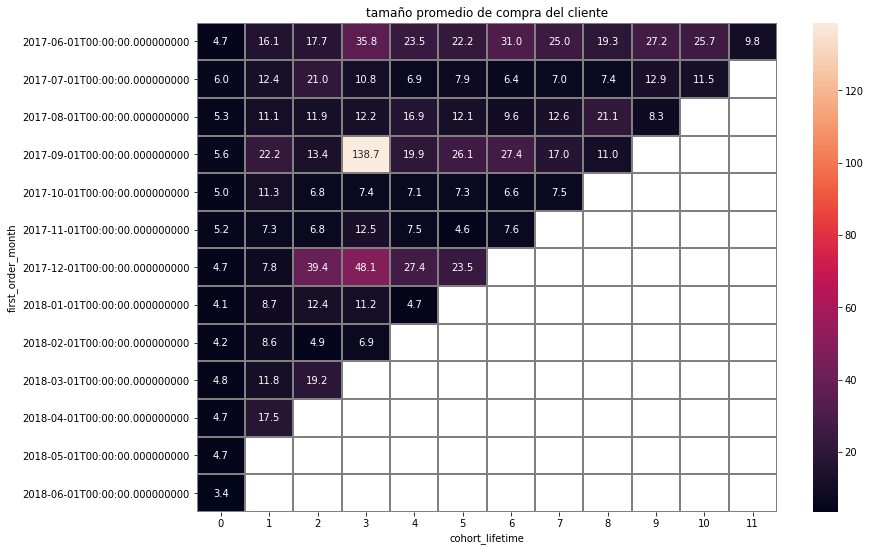

In [51]:
plt.figure(figsize=(13, 9))
plt.title('tamaño promedio de compra del cliente')
sns.heatmap(revenue_per_user_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')

En segundo lugar, se decidió hallar el ciclo de vida de las ventas de este cohorte, partiendo desde el ciclo de vida 0 hasta el 11. En el mapa de calor, se puede observar que es en el primer ciclo de vida o año 0 donde más ocurre el promedio de compra de los clientes.

#### ¿Cuánto dinero generan (ltv)?

In [52]:
first_orders = orders_data.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']
first_orders.head()

,Uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [53]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [54]:
orders_ = pd.merge(orders_data, first_orders, on=['Uid', 'first_order_month'])
orders_.head()

,Buy Ts,Revenue,Uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [55]:
cohorts = orders_.groupby(['first_order_month', 'order_month']).agg({'Revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [56]:
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1,'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['Revenue'] / report['n_buyers']
output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='sum').cumsum(axis=1).round(2)
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


Por último, se decidió utilizar la métrica ltv para poder hallar la cantidad total de dinero que un cliente aporta a la empresaen promedio al realizar las compras; y tomando la primera fecha de compra, el año de vida, los ingresos y el número de clientes únicos; se pudo obtener los valores de dicha métrica. Asimismo, se aprecia que el promedio del aporte es mayor en el ciclo de vida 0 y en el mes de junio del 2017, y con el tiempo va disminuyendo.

### Marketing

#### ¿Cuánto dinero se gastó? (en total y por mes)

In [57]:
costs_data['month'] = costs_data['dt'].astype('datetime64[M]')
monthly_costs = costs_data.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()
monthly_costs

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [58]:
total_costs = costs_data['costs'].sum()
total_costs

329131.62

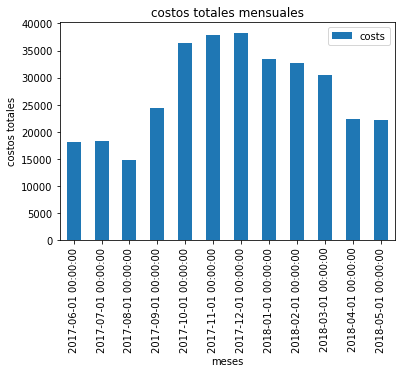

In [59]:
total_monthly_costs = costs_data.groupby(['month']).agg({'costs': 'sum'})
total_monthly_costs.plot(kind='bar')
plt.title('costos totales mensuales')
plt.xlabel('meses')
plt.ylabel('costos totales')
plt.show()

Se puede observar que finalizando el año 2017 hay mayores costos mensuales, y en el 2018 empieza a bajar.

#### ¿Cuánto costó la adquisición de clientes de cada una de las fuentes? (en total y por mes, para cada fuente) El costo de la adquisición debe calcularse por fuente para entender cuál de ellas tiene mejor costo de adquisición. ¿Cuáles son las caras y las más baratas?

In [60]:
costs_data.groupby('source_id').sum()

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [61]:
costs_data['costs_per_source'] = costs_data['costs'] / costs_data['source_id']
costs_data.pivot_table(index='month', columns='source_id', values='costs_per_source', aggfunc='sum')

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,1213.690,2577.216667,878.7000,523.224,31.691111,31.422
2017-07-01,1072.88,1166.555,2558.123333,882.4325,599.628,33.615556,32.982
2017-08-01,951.81,905.525,2047.846667,804.3400,437.056,27.658889,23.257
2017-09-01,1502.01,1492.830,3321.183333,1298.0650,769.828,46.180000,46.067
2017-10-01,2315.75,2422.500,5245.746667,1605.2100,1153.480,67.712222,62.724
2017-11-01,2445.16,2623.840,5675.113333,1347.2050,1265.068,75.908889,79.236
2017-12-01,2341.20,2448.900,5406.506667,1920.1175,1174.504,73.108889,64.586
2018-01-01,2186.18,2078.870,4936.260000,1458.1975,1074.304,60.795556,61.435
2018-02-01,2204.48,2237.170,4742.853333,1427.9900,1014.262,61.277778,48.088


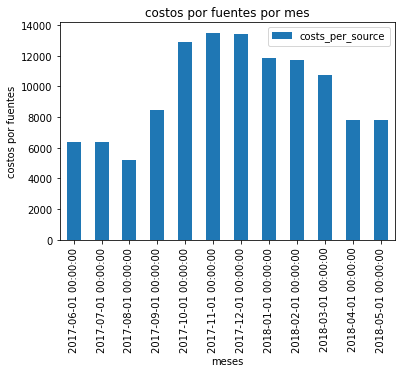

In [62]:
costs_data.groupby(['month']).agg({'costs_per_source': 'sum'}).plot(kind='bar')
plt.title('costos por fuentes por mes')
plt.xlabel('meses')
plt.ylabel('costos por fuentes')
plt.show()

Se puede observar que hay mayores costos por fuente finalizando el año 2017.

#### ¿Cuán rentables eran las inversiones? 

In [63]:
first_visits = visits_data.groupby('Uid').agg({'Start Ts': 'min'}).reset_index()
first_visits = first_visits.rename(columns={'Start Ts':'first_session_start_ts'}) 
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_start_ts'].astype('datetime64[M]')
first_visits.head()

,Uid,first_session_start_ts,first_session_dt,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01


In [64]:
visits_full = pd.merge(visits_data, first_visits, on='Uid')
visits_full['age_months'] = (visits_full['month'] - visits_full['first_session_month']) / np.timedelta64(1, 'M')
visits_full['age_months'] = visits_full['age_months'].round().astype('int')
visits_full.head()

,Device,End Ts,source_id,Start Ts,Uid,day,year,week,month,session_duration_sec,first_session_start_ts,first_session_dt,first_session_month,age_months
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017,2017-12-14,2017-12-01,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018,2018-02-15,2018-02-01,1680,2018-02-19 16:53:00,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018,2018-05-17,2018-05-01,1440,2018-03-09 20:05:00,2018-03-09,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018,2018-03-08,2018-03-01,1680,2018-03-09 20:05:00,2018-03-09,2018-03-01,0


In [65]:
orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
orders['buy_dt'] = orders['Buy Ts'].dt.date
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')
orders.head()

,Buy Ts,Revenue,Uid,buy_dt,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [66]:
frst_orders = orders.groupby('Uid').agg({'Buy Ts': 'min'}).reset_index()
frst_orders = frst_orders.rename(columns={'Buy Ts':'first_order_ts'}) 
frst_orders['first_order_dt'] = frst_orders['first_order_ts'].dt.date
frst_orders['first_order_month'] = frst_orders['first_order_ts'].astype('datetime64[M]')
frst_orders.head()

,Uid,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [67]:
buyers = pd.merge(first_visits, frst_orders, on='Uid')
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['days_to_first_purchase'] = (buyers['first_session_dt'] - buyers['first_order_dt']) / np.timedelta64(1, 'M')
buyers.head()

,Uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,-3.515473
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0.000000
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0.000000
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,-0.032855
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0.000000


In [68]:
costs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   source_id         2542 non-null   int64         
 1   dt                2542 non-null   datetime64[ns]
 2   costs             2542 non-null   float64       
 3   month             2542 non-null   datetime64[ns]
 4   costs_per_source  2542 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 99.4 KB


In [69]:
users = visits_full.sort_values(by='Start Ts').groupby('Uid')['source_id'].first().reset_index()
buyers = buyers.merge(users, on='Uid')
buyers

,Uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,-3.515473,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0.000000,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0.000000,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,-0.032855,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0.000000,5
...,...,...,...,...,...,...,...,...,...
36517,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11-01,-3.154069,5
36518,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01,0.000000,3
36519,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01,-7.589478,2
36520,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01,-3.384053,3


In [70]:
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'Uid': 'nunique'}).reset_index()
buyers_daily = buyers_daily.rename(columns={'Uid': 'n_buyers'})
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])
buyers_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   source_id       2434 non-null   int64         
 1   first_order_dt  2434 non-null   datetime64[ns]
 2   n_buyers        2434 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 57.2 KB


In [71]:
costs_ = pd.merge(buyers_daily, costs_data, on='source_id')
costs_['cac'] = costs_['costs'] / costs_['n_buyers']
costs_.head()

,source_id,first_order_dt,n_buyers,dt,costs,month,costs_per_source,cac
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,75.20,5.371429
1,1,2017-06-01,14,2017-06-02,62.25,2017-06-01,62.25,4.446429
2,1,2017-06-01,14,2017-06-03,36.53,2017-06-01,36.53,2.609286
3,1,2017-06-01,14,2017-06-04,55.00,2017-06-01,55.00,3.928571
4,1,2017-06-01,14,2017-06-05,57.08,2017-06-01,57.08,4.077143


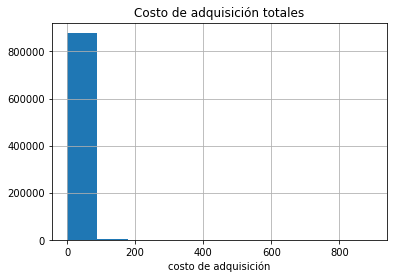

In [72]:
costs_['cac'].hist(bins=10)
plt.title('Costo de adquisición totales')
plt.xlabel('costo de adquisición')
plt.show()

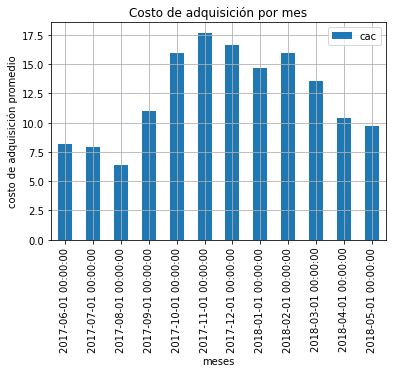

In [73]:
costs_.groupby('month').agg({'cac': 'mean'}).plot(kind='bar', grid=True)
plt.title('Costo de adquisición por mes')
plt.xlabel('meses')
plt.ylabel('costo de adquisición promedio')
plt.show()

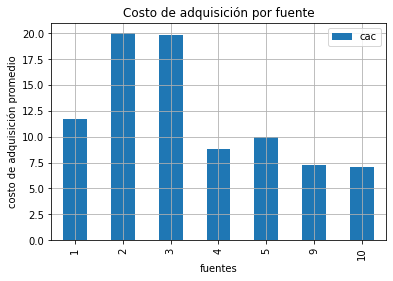

In [74]:
costs_.groupby(['source_id']).agg({'cac': 'mean'}).plot(kind='bar', grid=True)
plt.title('Costo de adquisición por fuente')
plt.xlabel('fuentes')
plt.ylabel('costo de adquisición promedio')
plt.show()

In [75]:
costs_ = costs_.rename(columns={'n_buyers': 'initial_buyers'})
report_ = pd.merge(report,costs_, left_on='first_order_month', right_on='month')
report_.head()

,first_order_month,n_buyers,order_month,Revenue,age,ltv,source_id,first_order_dt,initial_buyers,dt,costs,month,costs_per_source,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,75.20,5.371429
1,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,1,2017-06-01,14,2017-06-02,62.25,2017-06-01,62.25,4.446429
2,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,1,2017-06-01,14,2017-06-03,36.53,2017-06-01,36.53,2.609286
3,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,1,2017-06-01,14,2017-06-04,55.00,2017-06-01,55.00,3.928571
4,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,1,2017-06-01,14,2017-06-05,57.08,2017-06-01,57.08,4.077143


In [76]:
report_.groupby('source_id').agg({'cac': 'mean'}).round(2)

,cac
source_id,
1,10.94
2,18.89
3,18.65
4,8.35
5,9.42
9,6.84
10,6.71


El costo de adquisición promedio es mayor para la fuente 2, es decir, es la fuente menos confiable y rentable.

In [77]:
report_['romi'] = report_['ltv'] / report_['cac']
output_2 = report_.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
output_2.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.69,1.86,2.02,2.36,2.72,2.98,3.32,3.53,3.73,3.95,4.15,4.24
2017-07-01,2.27,2.39,2.63,2.76,2.83,2.89,2.93,2.99,3.05,3.10,3.16,NaN
2017-08-01,2.68,2.92,3.15,3.35,3.60,3.75,3.85,4.06,4.21,4.30,NaN,NaN
2017-09-01,1.23,1.47,1.58,2.45,2.54,2.68,2.83,2.88,2.92,NaN,NaN,NaN
2017-10-01,1.32,1.46,1.51,1.55,1.59,1.62,1.65,1.68,NaN,NaN,NaN,NaN
2017-11-01,1.01,1.09,1.13,1.19,1.22,1.23,1.25,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.70,0.74,0.88,1.03,1.08,1.13,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.82,0.88,0.94,0.97,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.87,0.93,0.94,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


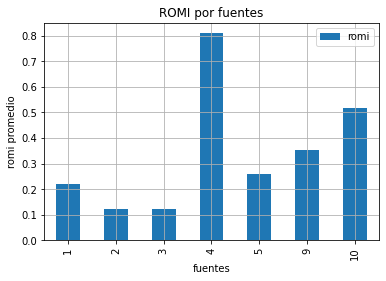

In [78]:
report_.groupby(['source_id']).agg({'romi': 'mean'}).plot(kind='bar', grid=True)
plt.title('ROMI por fuentes')
plt.xlabel('fuentes')
plt.ylabel('romi promedio')
plt.show()

El ROMI es estable para las fuentes 4, ya que posee mayor  ROMI que las otras fuentes.

el costo de adquision de los clientes en los distintos cohortes es menor que el ltv, lo que significa que la economía unitaria por cliente es sólida. Asimismo, se halló el retorno de inversión con los datos de los primeros meses de compra, las edades de los cohortes, el ltv y cac; se puede observar que el romi acumulado aumenta más notoriamente para el primer cohorte, pero con el tiempo va disminuyendo.

## Conclusión general

Después de analizar los datasets se pudo concluir lo siguiente:


1. Primero, se decidió analizar la información de los datsets, la cantidad de columnas, las filas, la cantidad de datos, los tipos de columnas, etc. Con el fin de optimizar los datos de cada dataframe.
2. No se encontraron valores ausentes.
3. No se encontraron datos duplicados.
4. Se tuvieron que añadir nuevas columnas en los dataframes para los meses, debido a que se debe conocer el ciclo de vida de las visitas, asi como sus compras, y los gastos; además, para dividirlos en cohortes.

Asimismo, se comprobó lo siguiente:

1. Para conocer acerca del comportamiento de los usuarios en el sitio web, cuanto tiempo pasan ahí, con que frecuencia regresan, la cantidad de sesiones. Se utilizaron métricas como el sticky factor para saber que tan leal era la audiencia; el dau, mau y wau, para saber el número de usuarios activos por día, semana y mes. Obteniendo resultados positivos, es decir una buena cantidad de usuarios regresan y pasan buen tiempo en el sitio web.
2. Para conocer el tamaño promedio de compra, cuando los usuarios empiezan a comprar; se decidio comenzar dese el primer momento donde el usuario realiza su compra, dividiéndolos en cohortes, con las fechas en meses, el ciclo de vida, la edad, los ingresos de cada usuario. Y es en junio del 2017, y mayo del 2018, cuando más activas estan las ventas, y en algunos casos empiezan a crecer las ventas, así como el número de clientes.
3. Por último, para evaluar los gastos, se decidió hacerlo de forma mensual, por fuente, y hallar el retorno de inversión por los gastos, asi como los costos de adquisición por cliente. Resultando que la economía unitaria por cliente es sólida, ya que el costo de adquisición es menor que el total de dinero que el cliente aporta a la empresa, el romi está más activo en los primeros años del ciclo de vida; y las fuentes con código 9, 10 y 4 la que menor gasto genera.

Después de analizar los datos, se puede concluir que que la empresa va en buen camino, pero se recomienda no descuidarse y poner más atención en por qué los clientes empiezan a bajar en los últimos meses del 2018; asimismo, la elección de la fuente 9 o 10 sería la correcta, además la fuente 4 a parte de tener un costo de adquisición bajon su retorno de inversión es alto, asi que esta fuente tambien sería buena elegirla. Estas fuentes son las mejores opciones,  ya que su retorno de inversión es estable, asi como su costo de adquisición de cliente, es decir es rentable elegir cualquiera de estas 3 fuentes.